# Python機械学習クックブック

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
cv2.__version__

# jupyter notebookの場合はmatplotlibのインライン表示を有効にする
%matplotlib inline

## 画像の読み込み

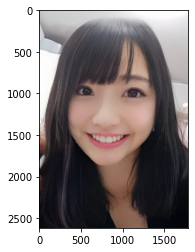

In [10]:
img = cv2.imread("./shining.jpg")

# GBRの順番になっているので、matplotlibで表示するためにはRGBの順番にする必要がある
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

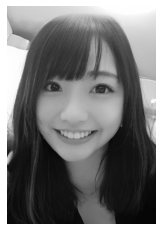

numpy.ndarray

In [20]:
# グレースケールで読み込む
gray_img = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap="gray"), plt.axis("off")
plt.show()

# 画像はnumpyのndarrayに変換されている
type(gray_img)

## 画像の保存

In [22]:
img = cv2.imread("./shining.jpg")

# 画像の保存
cv2.imwrite("./shining_save.jpg", img)

True

## 画像サイズの変更

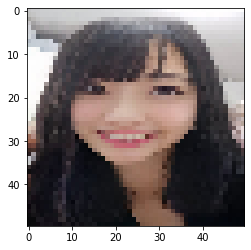

In [23]:
img = cv2.imread("./shining.jpg")

img_50_50 = cv2.resize(img, (50, 50))

# 画像の表示
plt.imshow(cv2.cvtColor(img_50_50, cv2.COLOR_BGR2RGB))
plt.show()

## 画像のクロップ

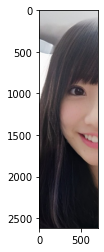

In [32]:
img = cv2.imread("./shining.jpg")

# 配列のスライスを使って画像の一部を切り出す
img_croped = img[:, 100:800]

# 画像の表示
plt.imshow(cv2.cvtColor(img_croped, cv2.COLOR_BGR2RGB))
plt.show()

## 画像をぼかす

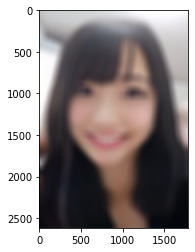

In [42]:
img = cv2.imread("./shining.jpg")

# 100x100のカーネル(ピクセルの平均化)でぼかす
img_blur = cv2.blur(img, (100, 100))

# 画像の表示
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 画像をくっきりさせる

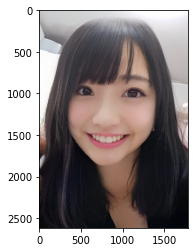

In [47]:
img = cv2.imread("./shining.jpg")

# ピクセルを際立たせるカーネルでくっきりさせる
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharp = cv2.filter2D(img, -1, kernel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_sharp, cv2.COLOR_BGR2RGB))
plt.show()

## コントラストの強調

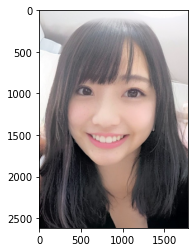

In [51]:
img_bgr = cv2.imread("./shining.jpg")

# YUVに変換
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

# 画像を強調(ヒストグラム均等化)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

# RGBに変換
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# 画像の表示
plt.imshow(img_rgb)
plt.show()

## 色の分離

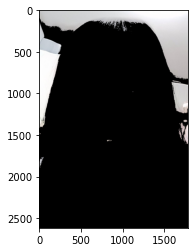

In [65]:
img_bgr = cv2.imread("./shining.jpg")

# HSVに変換
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# HSV空間で「白」の範囲を定義
lower_white = np.array([0, 0, 180])
upper_white = np.array([180, 30, 255])

# 白以外の部分を黒にするマスクを作成
img_mask = cv2.inRange(img_hsv, lower_white, upper_white)

# 画像にマスクを適用
img_bgr_masked = cv2.bitwise_and(img_bgr, img_bgr, mask=img_mask)

# 画像の表示
plt.imshow(cv2.cvtColor(img_bgr_masked, cv2.COLOR_BGR2RGB))
plt.show()

## 画像の2値化

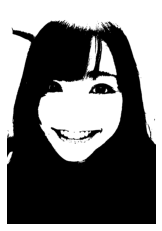

In [66]:
# 単純な2値化
# 画像をグレースケールで読み込み
img_gray = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)

# 画像を2値化(閾値127で分割)
img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)[1]

# 画像の表示
plt.imshow(img_binary, cmap="gray"), plt.axis("off")
plt.show()

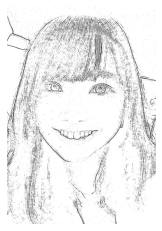

In [75]:
# 適応的閾値処理
# 画像をグレースケールで読み込み
img_gray = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)

# 適応的閾値処理を行う
max_output_value = 255  # 出力するピクセルの最大値
neighborhood_size = 11  # 閾値計算に使用するピクセルの数(奇数を指定する)
subtract_from_mean = 2  # 計算された閾値から引く値

# 適応的閾値処理を行う
img_adapt = cv2.adaptiveThreshold(
    img_gray,
    max_output_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # ピクセルごとに閾値を計算
    cv2.THRESH_BINARY,  # 二値化処理
    neighborhood_size,
    subtract_from_mean,
)

# 画像の表示
plt.imshow(img_adapt, cmap="gray"), plt.axis("off")
plt.show()

## エッジの検出

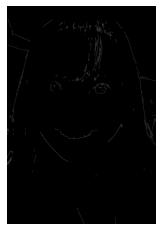

In [83]:
img_gray = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)

# 輝度の中央値を計算
median_intensity = np.median(img_gray)

# 中央値の0.67倍と1.33倍の輝度に振り分ける
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Cannyアルゴリズムを適用
img_canny = cv2.Canny(img_gray, lower_threshold, upper_threshold)

# 画像の表示
plt.imshow(img_canny, cmap="gray"), plt.axis("off")
plt.show()

## コーナーの検出

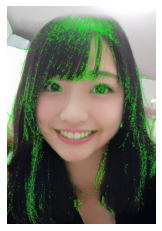

In [137]:
img_bgr = cv2.imread("./shining.jpg")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

# コーナー検出のパラメータを設定
block_size = 2
aperture = 29
free_parameter = 0.04

# コーナー検出を行う
corners = cv2.cornerHarris(img_gray, block_size, aperture, free_parameter)

# コーナー部分を強調する
detector_corners = cv2.dilate(corners, None)

# 検出したコーナーがしきい値以上の値を持つピクセルを緑で塗る
threshold = 0.00001
img_bgr[detector_corners > threshold * detector_corners.max()] = [
    0,
    255,
    0,
]

# BGRからRGBに変換して画像を表示
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb), plt.axis("off")
plt.show()

## 色ヒストグラムを確認

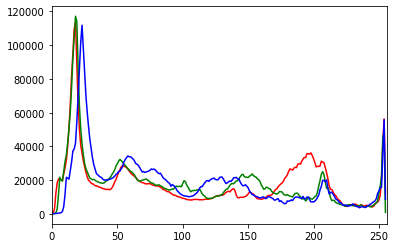

In [153]:
img_bgr = cv2.imread("./shining.jpg")

# RGBに変換
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 特徴量を格納するリストを作成
features = []

# それぞれの色のチャンネルを定義
colors = ("r", "g", "b")

# それぞれのチャンネルについてヒストグラムを計算
for i, channel in enumerate(colors):
    histogram = cv2.calcHist(
        [img_rgb],  # 画像
        [i],  # チャンネルインデックス
        None,  # マスクは使用しない
        [256],  # ヒストグラムの大きさ
        [0, 256],  # 範囲
    )
    features.extend(histogram)

    plt.plot(histogram, color=channel)
plt.xlim([0, 256])
plt.show()